# SDSC2001 Project
#### Name: Bazarbay Alisher
#### SID: 55986134

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration

#### Import libraries for the project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
%matplotlib inline

In [2]:
main = pd.read_csv('creditcard_train.csv')
main.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Dataset has - {} rows, {} columns".format(main.shape[0],main.shape[1]))

Dataset has - 284657 rows, 31 columns


If we look at "Time" feature, there are 284,807 transactions within 2 consecutive days (~172792 seconds).

In [4]:
print('First time: {}s\nLast time: {}s'.format(main['Time'].min() ,main['Time'].max()))

First time: 0.0s
Last time: 172792.0s


In [5]:
print(main.describe())

                Time             V1             V2             V3  \
count  284657.000000  284657.000000  284657.000000  284657.000000   
mean    94820.043168       0.000942      -0.000761       0.001280   
std     47486.331846       1.955946       1.649907       1.510265   
min         0.000000     -56.407510     -72.715728     -48.325590   
25%     54208.000000      -0.920083      -0.598696      -0.889759   
50%     84704.000000       0.018393       0.065213       0.179930   
75%    139324.000000       1.315753       0.803360       1.027294   
max    172792.000000       2.454930      22.057730       9.382558   

                  V4             V5             V6             V7  \
count  284657.000000  284657.000000  284657.000000  284657.000000   
mean       -0.000844       0.000591       0.000233       0.000956   
std         1.413999       1.378060       1.332089       1.230796   
min        -5.683171    -113.743300     -26.160506     -43.557240   
25%        -0.848833      -0.6914

The dataset is highly unbalanced:

In [6]:
print('{} fraud transactions out of {} records'.format(main[main['Class'] == 1].shape[0],main.shape[0]))

442 fraud transactions out of 284657 records


Plot the difference to see the significance:

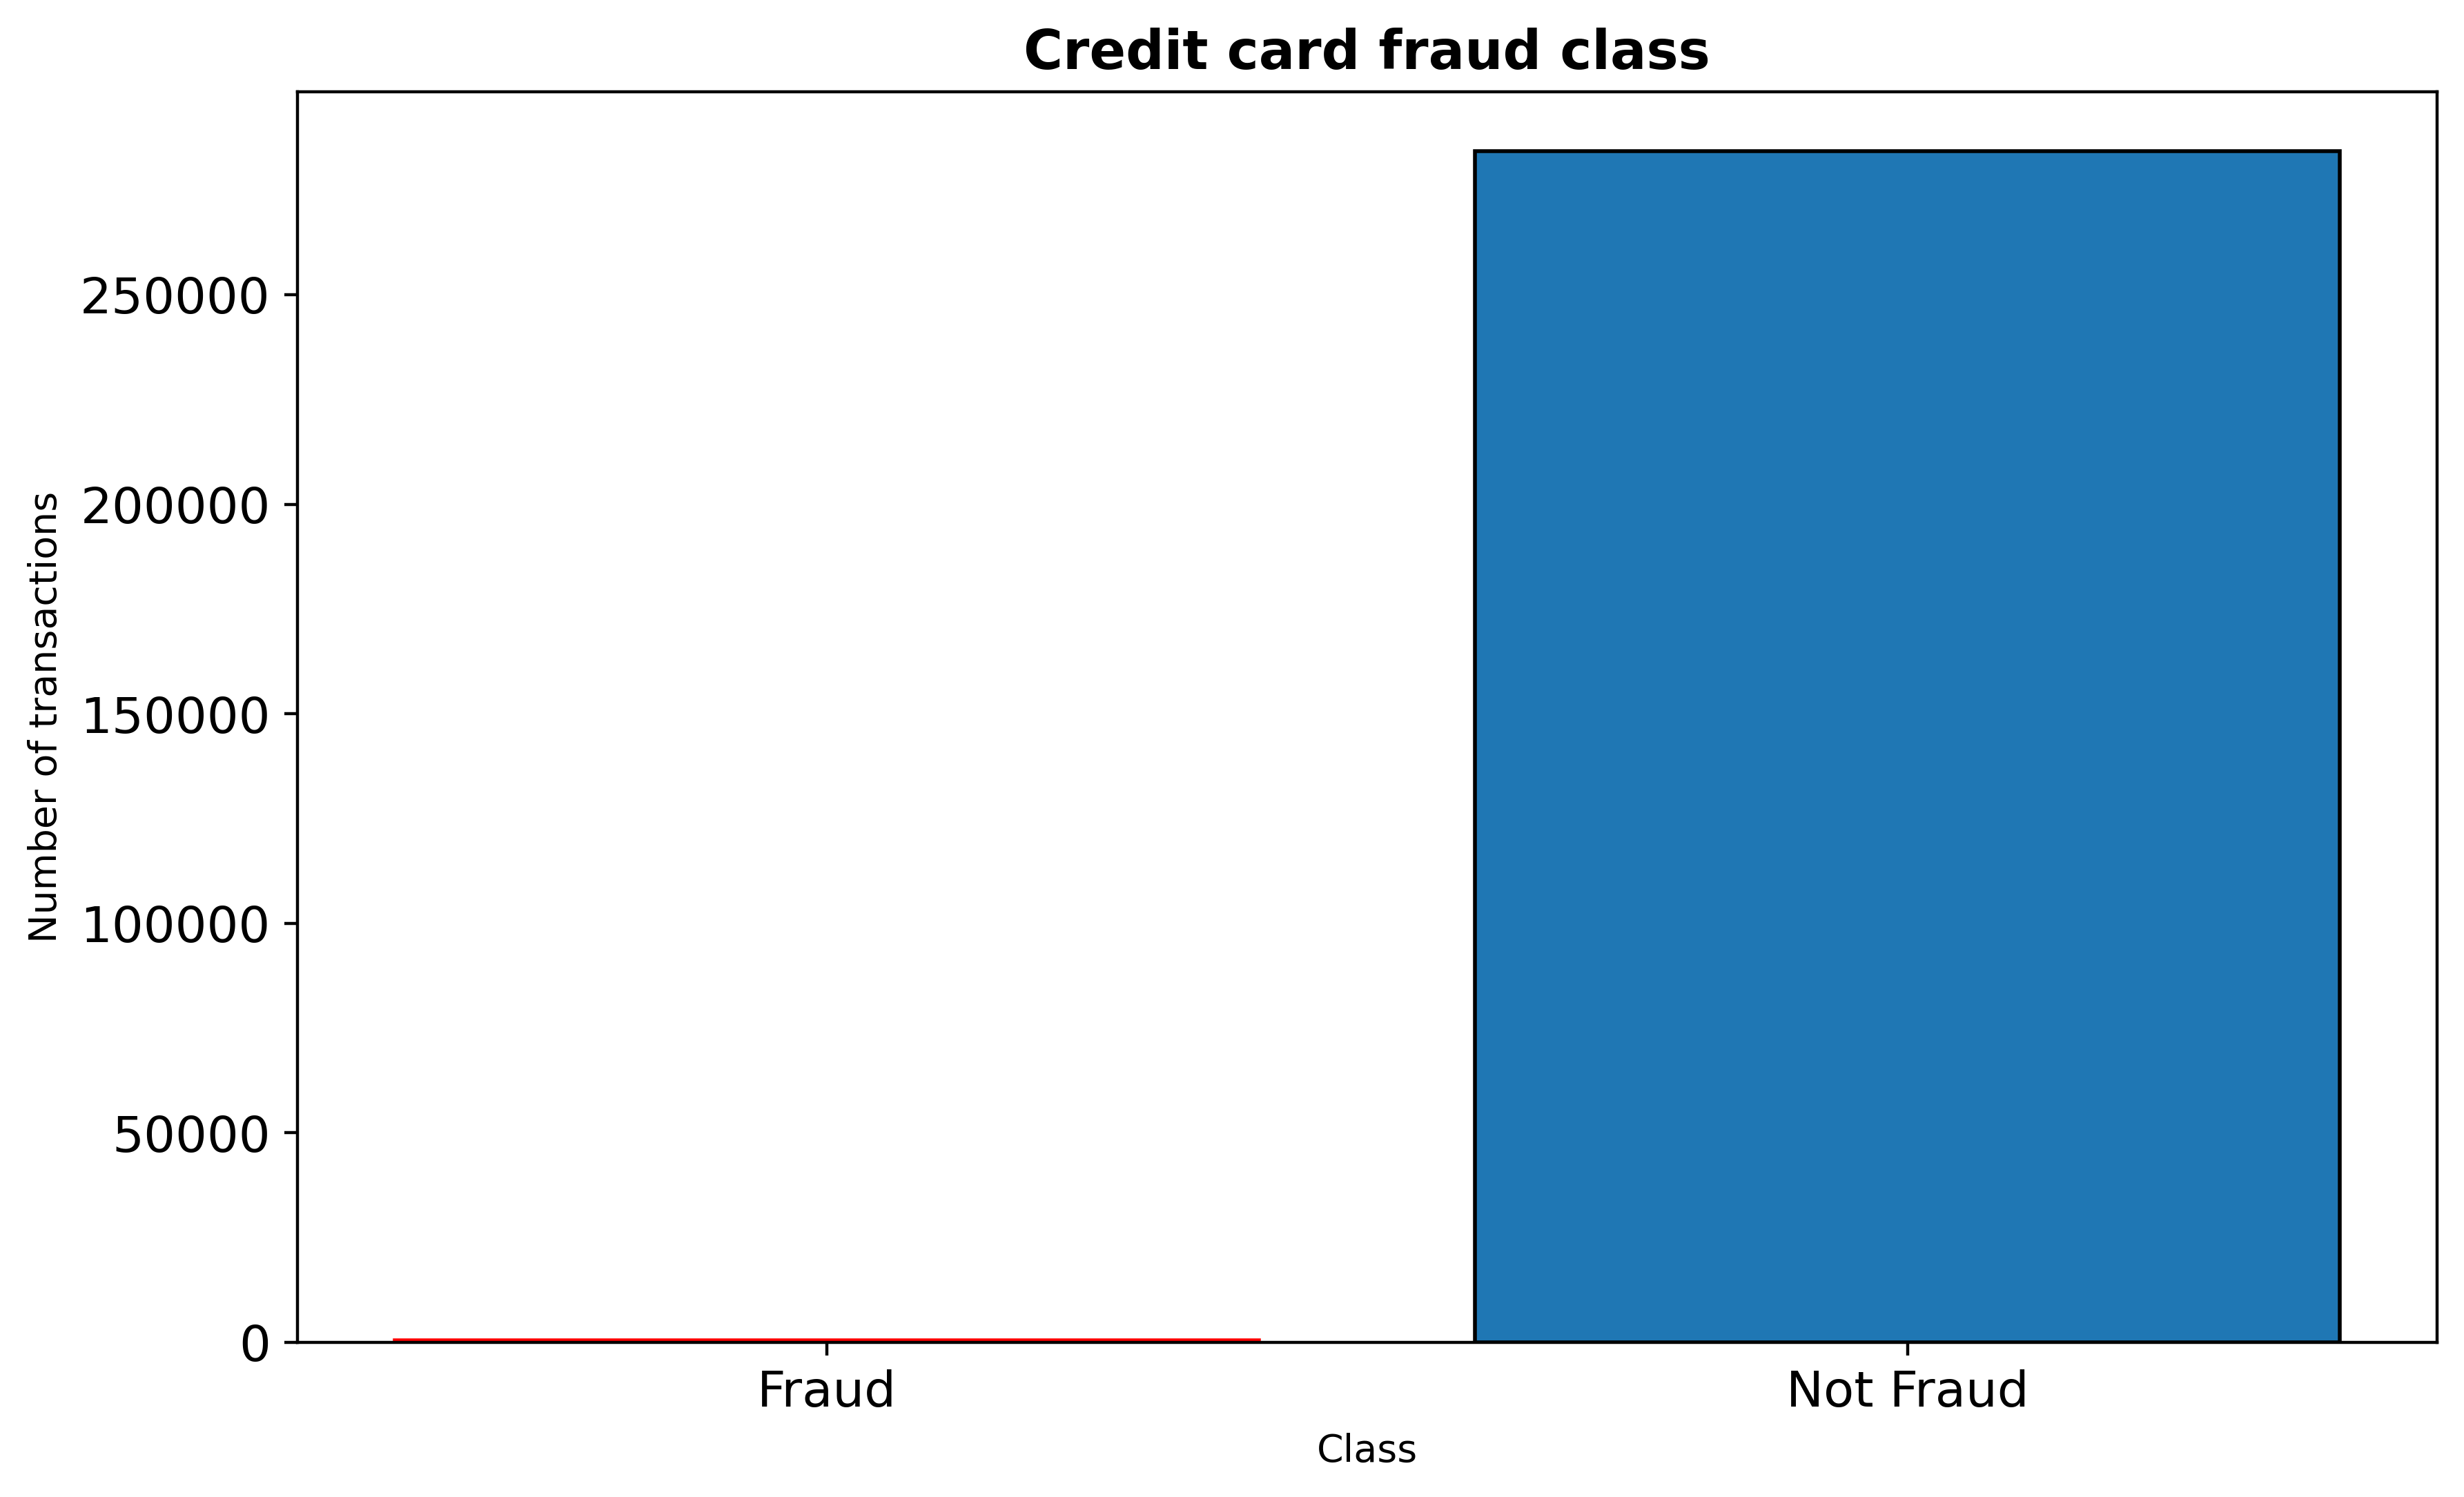

In [7]:
fig, ax = plt.subplots( figsize=(10, 6), dpi = 400)
y = [main[main['Class'] == 1].shape[0],main[main['Class'] == 0].shape[0]]
ax.set_xlabel("Class", fontsize=10)
ax.set_ylabel("Number of transactions",  fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_title('Credit card fraud class', fontsize=14, fontweight='bold')


p1 = ax.bar(['Fraud', 'Not Fraud'], y, label = 'Number of detection', edgecolor='black')
p1[0].set_color('r')

#### Missing values
In the following cells, we are going to detect the missing values in the dataset and handle them.

In [8]:
print('There are {} records with missing values'.format(sum(main.isnull().values.any(axis=1))))

There are 798 records with missing values


In [9]:
main.loc[main.isnull().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,NaN,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0
190,125.0,-2.807065,1.183098,2.974779,2.801477,-0.475110,3.217829,-0.401608,0.384395,2.408675,...,-0.201782,1.461535,NaN,-0.581133,-0.101785,0.529386,0.362411,0.237647,43.71,0
341,251.0,1.206638,0.143345,-0.131756,0.902486,0.219547,-0.028155,0.099295,0.002020,0.166709,...,0.006414,NaN,-0.186810,-0.777284,0.686915,-0.246620,0.018176,0.011324,31.80,0
447,324.0,-0.622317,0.656826,1.094225,0.054665,0.746405,-0.973848,0.386710,-0.009876,-0.351714,...,-0.259937,-0.798558,NaN,-0.199902,-0.062407,0.104703,0.230467,0.102421,0.89,0
752,562.0,-0.312911,0.815136,1.405270,0.070527,0.058558,-1.030855,0.760191,-0.182238,0.037325,...,-0.326542,-0.821322,NaN,0.276734,-0.243046,0.049775,0.064619,-0.126739,10.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279729,169152.0,-3.635813,3.711787,-3.149754,-1.739089,-0.297295,-1.615713,0.351594,1.151963,1.331123,...,-0.005328,0.601108,NaN,-0.447803,0.271079,0.101288,0.695478,0.240983,0.77,0
280317,169538.0,-1.111834,1.406679,-0.054398,0.797061,0.781671,-0.318739,1.032628,0.208575,-0.739602,...,0.054031,NaN,-0.607505,-0.805241,1.149048,-0.154614,-0.363659,-0.010285,27.08,0
280865,169877.0,2.063303,0.021825,-1.303005,0.357877,0.031969,-1.274402,0.275638,-0.406445,0.527834,...,0.256744,0.935292,NaN,0.036357,0.267812,-0.107122,-0.013723,-0.058050,2.69,0
280936,169928.0,1.854614,-0.232140,-3.049440,0.452626,1.046284,-0.859755,0.859601,-0.401262,0.240077,...,0.069182,NaN,-0.226104,-0.014629,0.393198,0.712224,-0.134882,-0.031412,159.90,0


2 features have missing values - V22 and V23:

In [10]:
main.isnull().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

##### Predictive modelling
Prediction algorithm can be used to predict the missing values, in particular - linear regression. In the data set the first and last columns were dropped as Time feature makes no sense in detecting the fraud cases and class column is our target value. Then, the correlation matrix was plotted to find which variables correlated with V22 and V23 features. However, the variables of our interest do not have strong correlation with other variables 


<AxesSubplot:title={'center':'Correlation of variables'}>

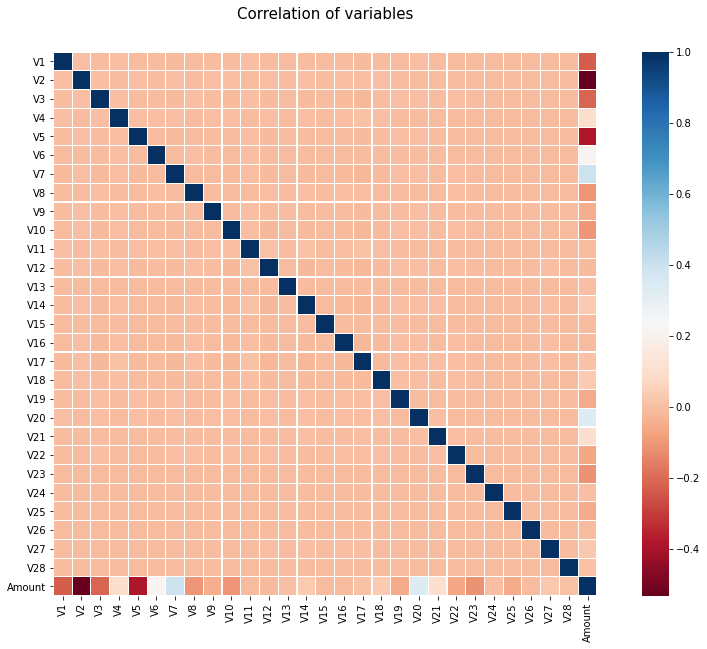

In [11]:
process_miss = main.iloc[:, 1:-1]
colormap = plt.cm.RdBu;
plt.figure(figsize=(16,10));
plt.title('Correlation of variables', y=1.05, size=15);
sns.heatmap(process_miss.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

##### Handling missing values in dataset
As we can see there are 798 records with missing values in total. The rows with missing values can be dropped as there is large number of training examples. And we also need to check whether there are fraud cases among missing value rows.

In [12]:
missing_to_ov = sum(main.isnull().values.any(axis=1)) / main.shape[0]
print('Proportion of records with missing values in dataset = {}%'.format(round(missing_to_ov*100,3)))

Proportion of records with missing values in dataset = 0.28%


Records with missing values do not have Fraud transaction. So, we can drop them.

In [13]:
main.loc[main.isnull().any(axis=1)][main['Class'] == 1]

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [14]:
main_miss = main.dropna()
print('{} records were dropped'.format(main.shape[0] - main_miss.shape[0]))

798 records were dropped


##### Outliers
Now, let's check the data for outliers.

We need to rescale the ‘Amount’ variable. To reduce its wide range, I used the ‘standardization’ to remove the mean and scale to unit variance. I also dropped 'Time' feature, as it just indicates the time of transaction in consequtive 2 days - not a delay or change.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_noOutliers = main_miss.copy()
normAmount = scaler.fit_transform(df_noOutliers['Amount'].values.reshape(-1, 1))
df_noOutliers['Amount'] = normAmount
df_noOutliers = df_noOutliers.drop('Time', axis = 1)

In [16]:
Q1 = np.percentile(df_noOutliers, 25, interpolation = 'midpoint')  
Q3 = np.percentile(df_noOutliers, 75, interpolation = 'midpoint')  
IQR = Q3 - Q1

In [17]:
#lower bound
lb = Q1 - 2.5*IQR
#upper bound
ub = Q3 + 2.5*IQR

Consider the boundaries, to check whether samples will be removed by Class(0 and 1) - is it below or greater than boundaries:

In [18]:
print('Lower bound = ',lb)
print('Upper bound = ',ub)

Lower bound =  -2.3470985884344215
Upper bound =  2.37005963058084


So we can see that samples will not be removed by Class and we can keep this column to count the proportion of minority class among outliers.

Then after I indicated the lower bound and upper bound, I will remove samples that are smaller than LB and greater than UB:

In [19]:
df_temp = df_noOutliers[~((df_noOutliers < lb) |(df_noOutliers > ub)).any(axis=1)]
df_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342370,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140065,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073618,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338456,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284647,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929368,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.331188,0
284650,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.342410,0
284651,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.342370,0
284653,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0


Let's check how many records were removed:

In [20]:
print('{}% or {} samples were removed, being outlier.'.format(round((main_miss.shape[0] - df_temp.shape[0])/main_miss.shape[0]*100),
                                                            main_miss.shape[0] - df_temp.shape[0]))

36% or 103103 samples were removed, being outlier.


We can see that around 36% records were removed from our original dataset because of that samples being outlier.

That is very big proportion. Now let's check how many Fraud cases we have among outliers.

In [21]:
outliers = df_noOutliers[((df_noOutliers < lb) |(df_noOutliers > ub)).any(axis=1)]
print('Among {} outliers we have {} samples of minority class (Fraud).'.format(outliers.shape[0], 
                                                        outliers[outliers['Class'] == 1].shape[0]))

Among 103103 outliers we have 420 samples of minority class (Fraud).


If we remove the outliers, we will delete 95% of Fraud samples. We already have highly unbalanced data and we will not remove the outliers, because we do not want to lose 95% of fraud samples. In further modules, whole dataset will be used for vizualisation and model building.

### Module 1 Summary
The data set is highly unbalanced: 442 fraud transactions out of 284657. Overall, there are 798 records with missing values in total and none of them relate to minority class. Also, only 2 features have missing values: V22 - 278 and V23 - 520. Consequenlty, all of them were dropped resulting in 283 859 left. Moreover, the feature correlation matrix were build to consider the correlations. However, there is no strong correlations observed. 

I also checked the dataset for outliers. I made outlier to be if the sample is lower that lower bound(Q1-2.5*IQR) or greater than upper bound(Q2 - 2.5*IQR). As a result, we have 36% of the whole dataset as outliers. Moreover, among them 420 Fraud sample, which is 95% of Fraud cases in the dataset. Taking into account that variables V1-V28 are the result of a PCA transformation, we do not know the exact meaning and the value of the features. So, I will not remove the outliers and will check the model perfomance with the original dataset.

My assumption - even with "outliers" the perfomance of built predictive models will be high. This assumption is based on the fact that the variables are the result of PCA transforamtion. The original features can be meaningful or not, we cannot just drop them as they are outliers.

### Module 2: Data Visualization

##### Transactions by Time feature
Look for how 2 class cases are distributed - Fraud and Not Fraud, by time. 

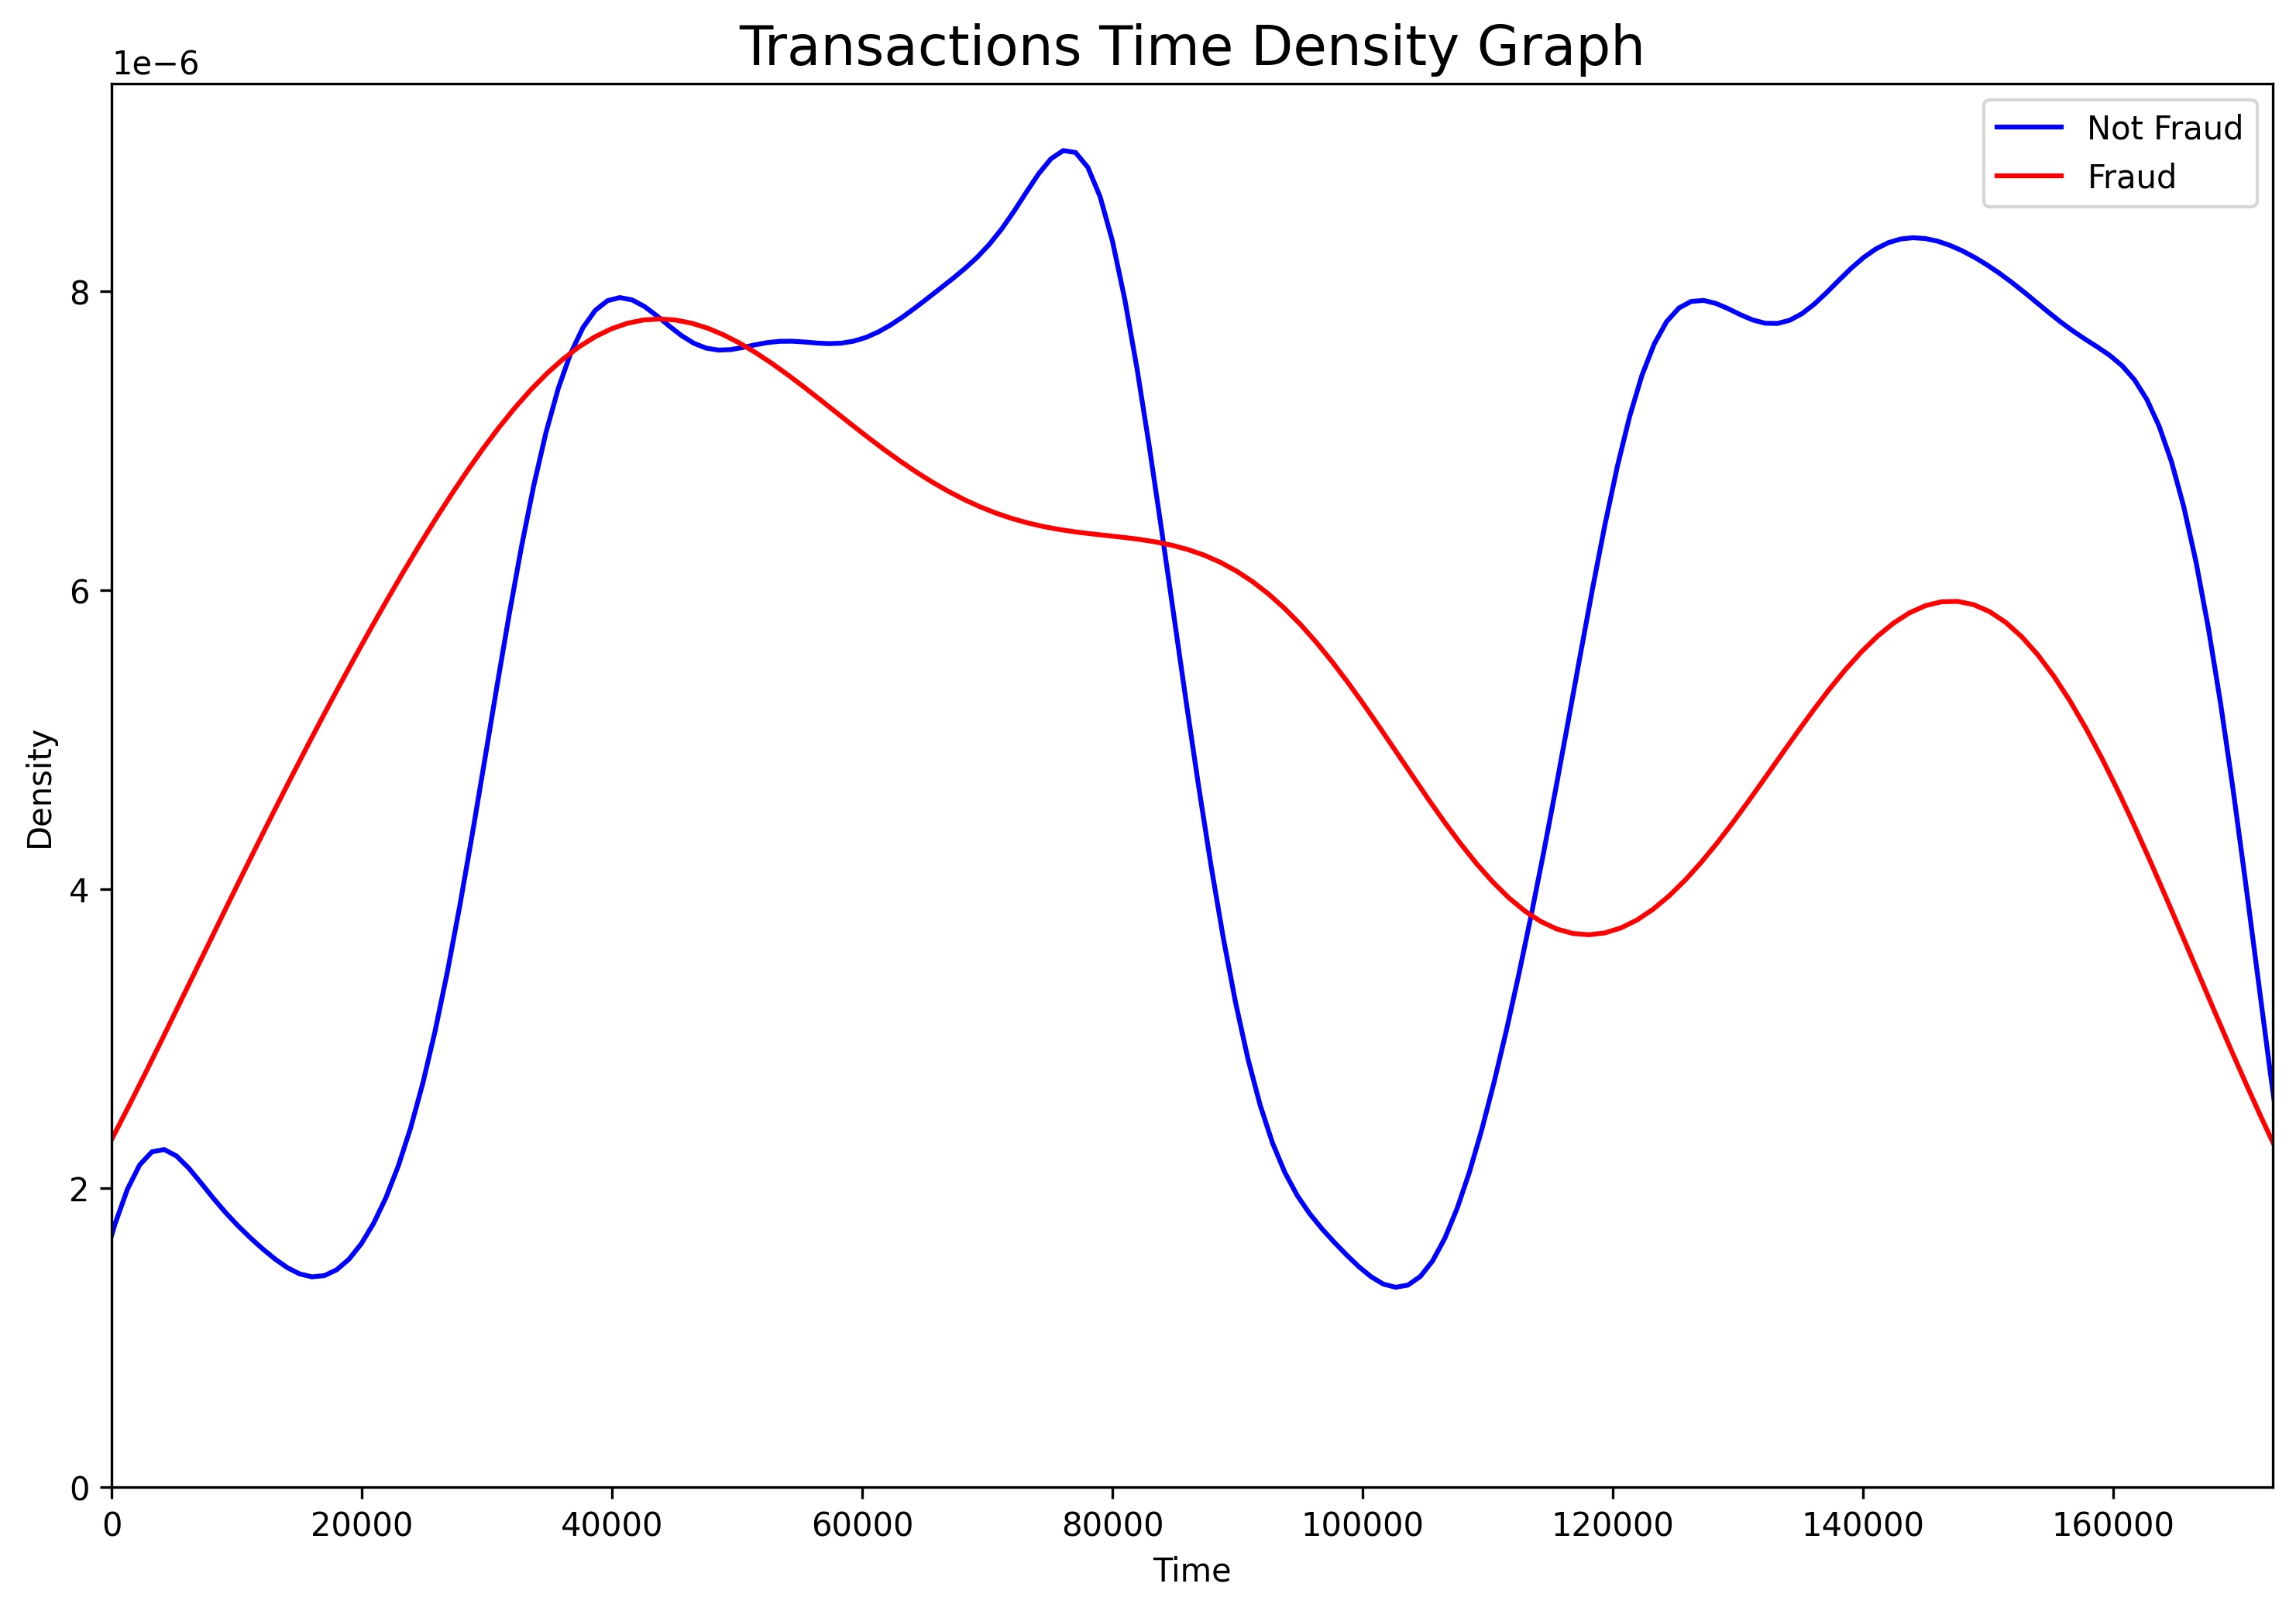

In [22]:
plt.figure(figsize=(12,8), dpi = 300)
sns.distplot(main_miss[main_miss['Class'] == 0]["Time"], color='b',hist = False, label = 'Not Fraud');
sns.distplot(main_miss[main_miss['Class'] == 1]["Time"], color='r',hist = False, label = 'Fraud');
plt.xlim([0,main_miss['Time'].max()])
plt.title('Transactions Time Density Graph', fontsize=17)
plt.legend()
plt.show()

Fraudulent and Not Fraudulent transactions have relatively equal distributions in time. Fraud distributed in more plain manner, while Not Fraud cases have flactuations, especially we can obserbe significant drop at around 100000s.

###### Divide into hours/minutes.
To better understand the patterns, it is better to transform "Time" to minutes and hours.

In [23]:
timeSec = pd.to_timedelta(main_miss['Time'], unit='s');
df = main_miss.copy()
df['timeMinute'] = (timeSec.dt.components.minutes).astype(int);
df['timeHour'] = (timeSec.dt.components.hours).astype(int);

Let's plot 2 graphs of cases distributed by hours (24H format) and minutes.

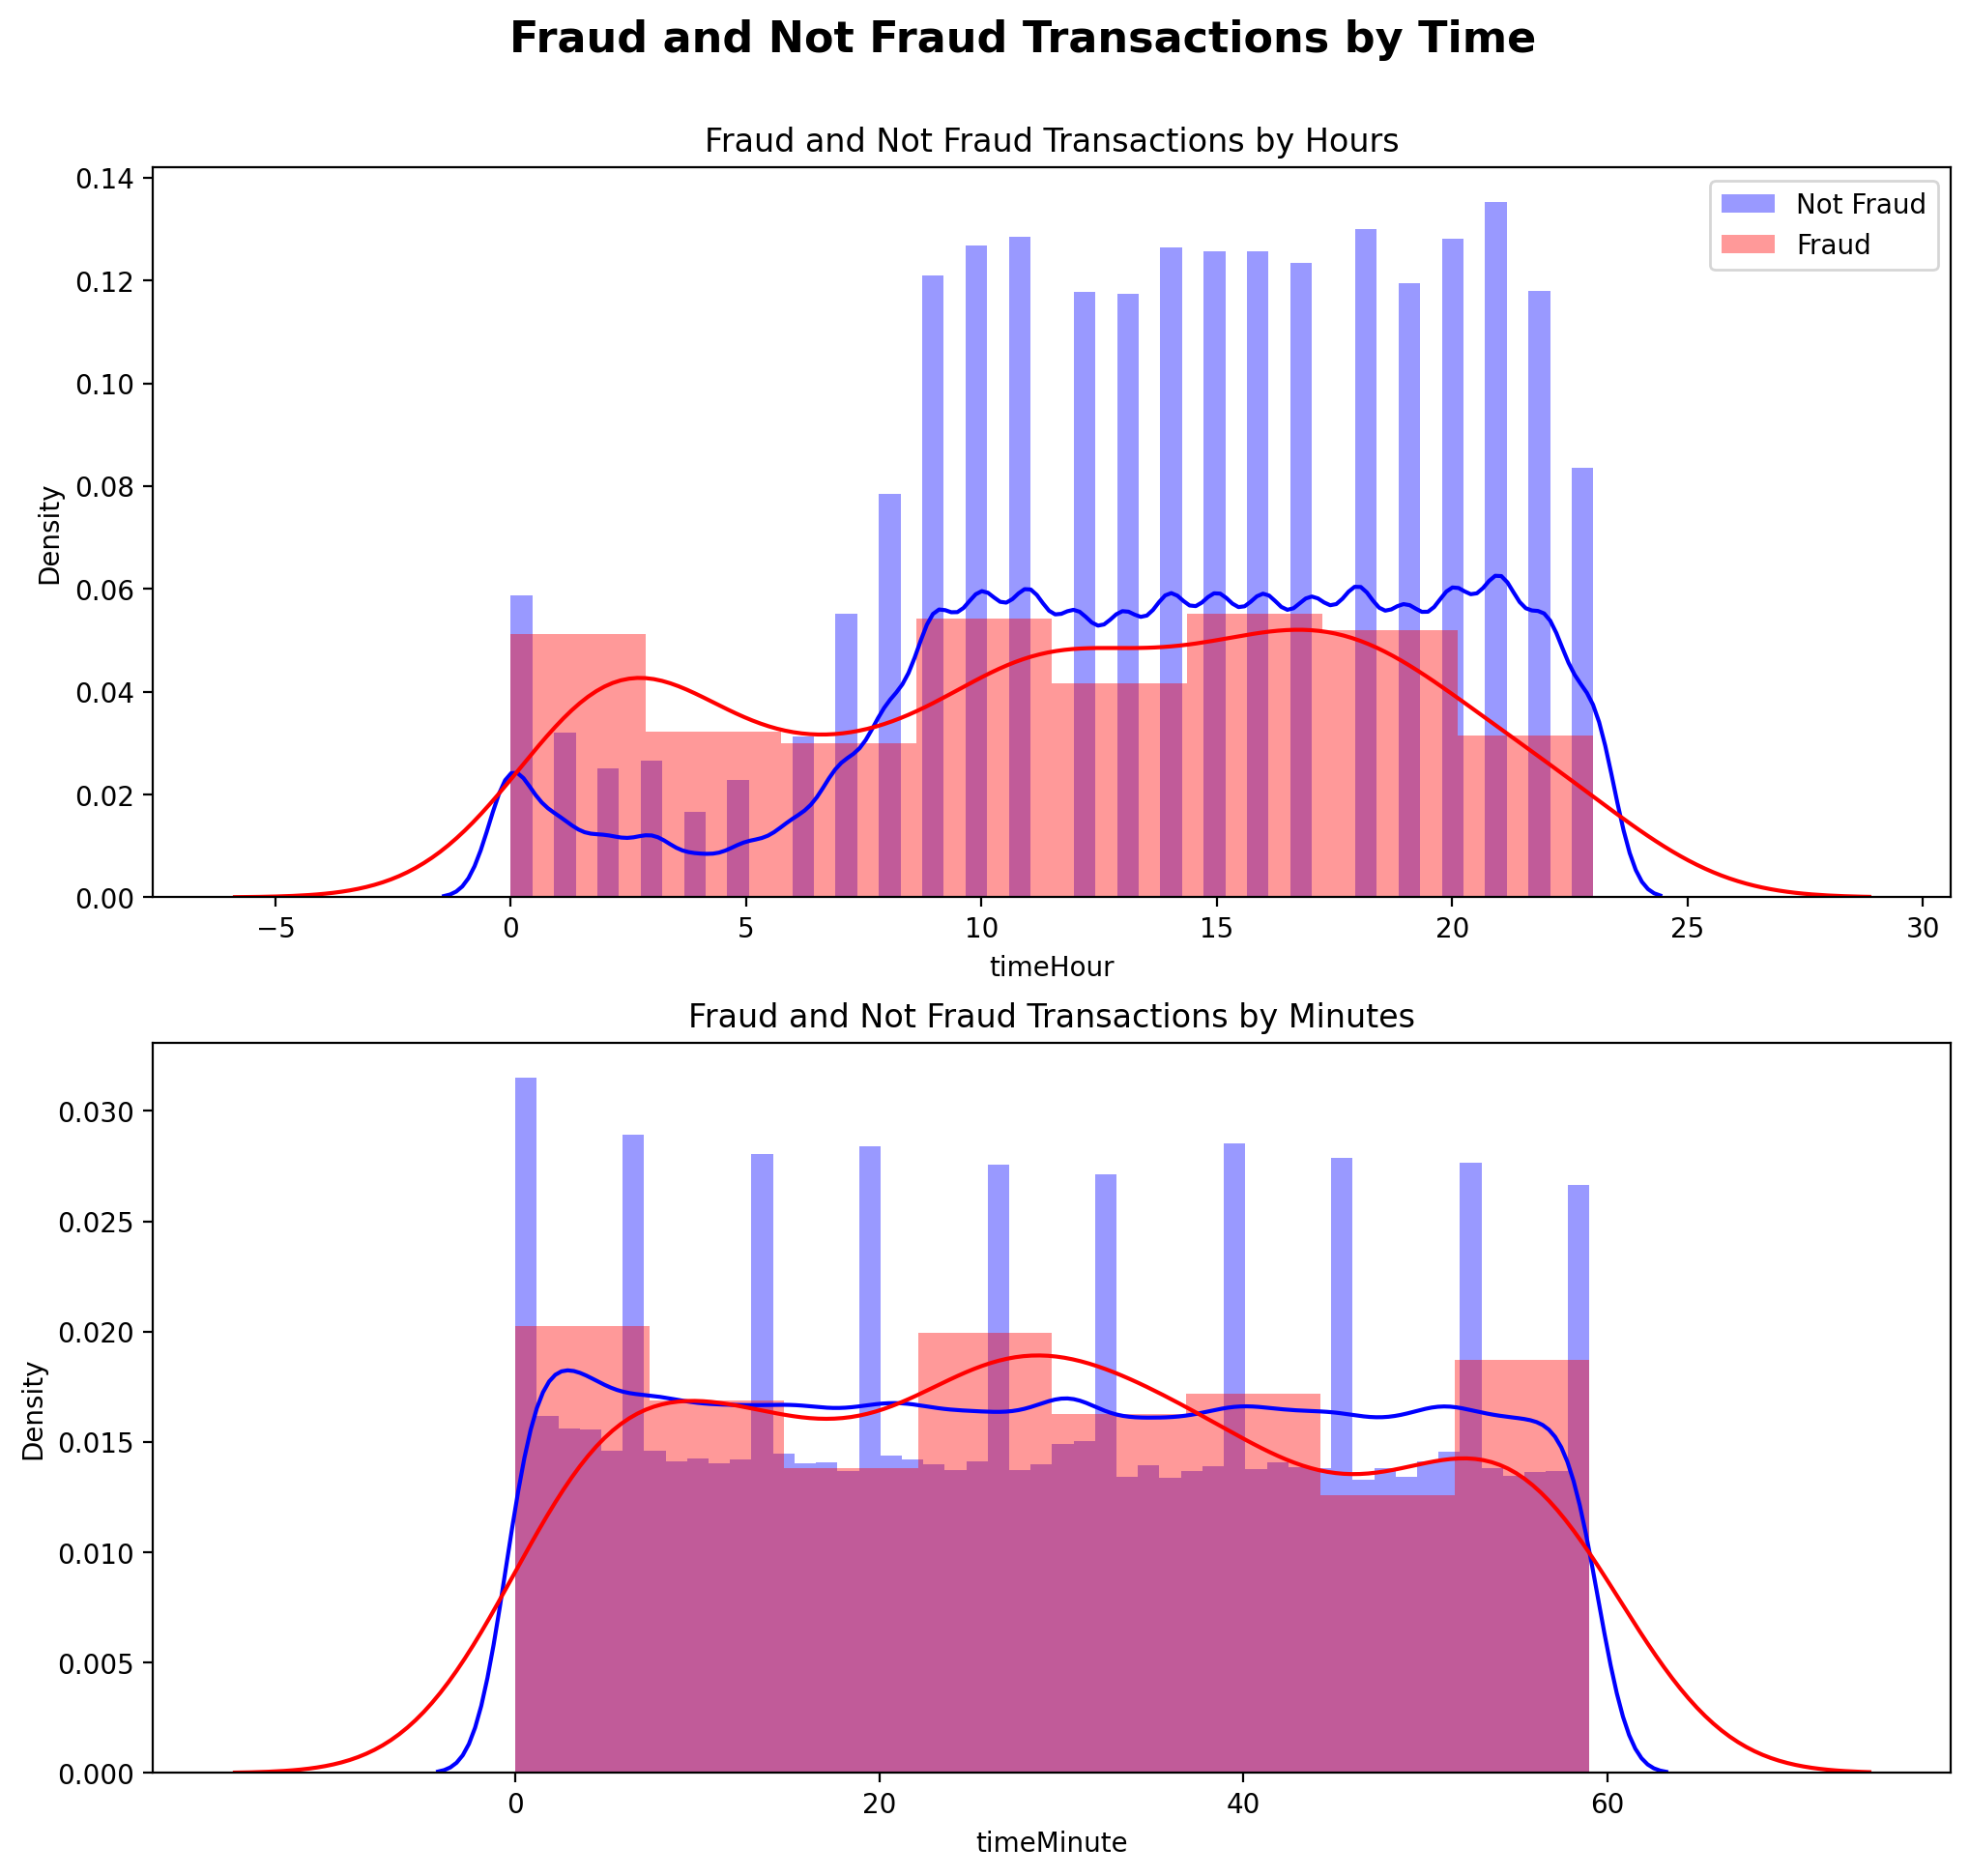

In [24]:
fig_time, ax_time = plt.subplots(2, figsize=(12, 11), dpi = 200)
fig_time.suptitle('Fraud and Not Fraud Transactions by Time', fontsize=16, fontweight='bold', y = 0.95)
ax_time[0].set_title('Fraud and Not Fraud Transactions by Hours', fontsize=12)
ax_time[1].set_title('Fraud and Not Fraud Transactions by Minutes', fontsize=12)

#By hour
sns.distplot(df[df['Class'] == 0]["timeHour"], ax=ax_time[0], color='b', label = 'Not Fraud');
sns.distplot(df[df['Class'] == 1]["timeHour"], ax=ax_time[0], color='r', label = 'Fraud');
#By minute
sns.distplot(df[df['Class'] == 0]["timeMinute"], ax=ax_time[1],color='b');
sns.distplot(df[df['Class'] == 1]["timeMinute"], ax=ax_time[1],color='r');
ax_time[0].legend()
plt.show()

Unfortunately we cannot see the clear pattern from the distributions above.

##### Amount feature
Let's look the distribution of cases by amount feature. First of all, divide data into 2 data frames and look the statistics of each class.

In [25]:
df_notFraud =main_miss[main_miss['Class'] == 0]
df_isFraud = main_miss[main_miss['Class'] == 1]
print("Not Fraud group statistics:\n")
print(df_notFraud["Amount"].describe())
print("\nFraud group statistics:")
print(df_isFraud["Amount"].describe())

Not Fraud group statistics:

count    283417.000000
mean         88.376354
std         250.414748
min           0.000000
25%           5.660000
50%          22.000000
75%          77.090000
max       25691.160000
Name: Amount, dtype: float64

Fraud group statistics:
count     442.000000
mean      119.798710
std       250.677832
min         0.000000
25%         1.000000
50%        10.850000
75%       105.620000
max      2125.870000
Name: Amount, dtype: float64


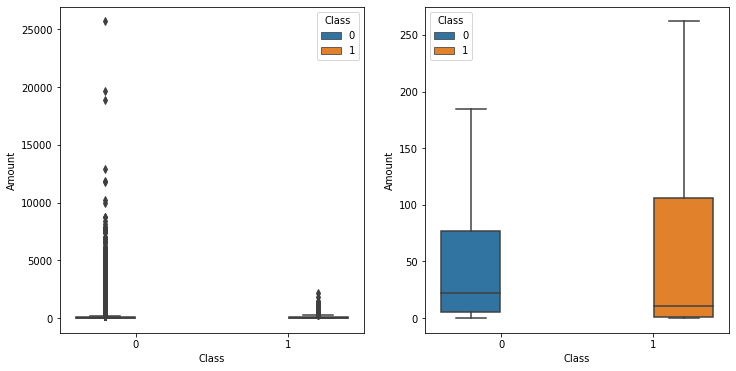

In [26]:
fig_amount, ax_amount = plt.subplots(ncols=2, figsize=(12, 6))
sns.boxplot(ax = ax_amount[0], x="Class", y="Amount", hue="Class",data=main_miss,dodge = True, showfliers=True)
sns.boxplot(ax = ax_amount[1], x="Class", y="Amount", hue="Class",data=main_miss,dodge = True,showfliers=False)
plt.show();

The not fraud transactions have a smaller mean and Q3; larger Q1 and Q2 and larger outliers. The IQR of fraudulent transactions are larger than normal transactions, but as was mentioned before normal transactions have larger values/amount transacted.

Now, let's take a look at the amount transacted during consequentive 2 days and color each case by class to see the pattern. It is obvious that fraudulent transactions have significatly smaller amount transacted and they are at almost same level.

<Figure size 3600x1800 with 0 Axes>

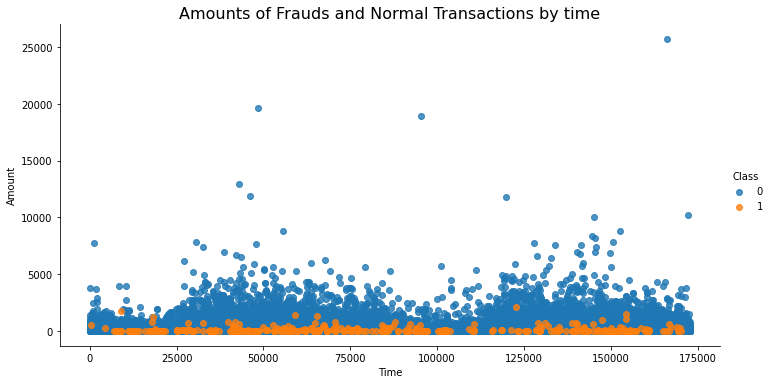

In [27]:
plt.figure(figsize=(12,6), dpi = 300);
sns.lmplot(y="Amount", x="Time",data=main_miss, hue='Class', fit_reg=False, aspect = 2, scatter_kws={'alpha':0.8})
plt.title("Amounts of Frauds and Normal Transactions by time",fontsize=16)
plt.show();

##### Feature Density plot
Look which features can clearly divide the groups/how separates the distributions for fraud and not fraud groups.

<Figure size 432x288 with 0 Axes>

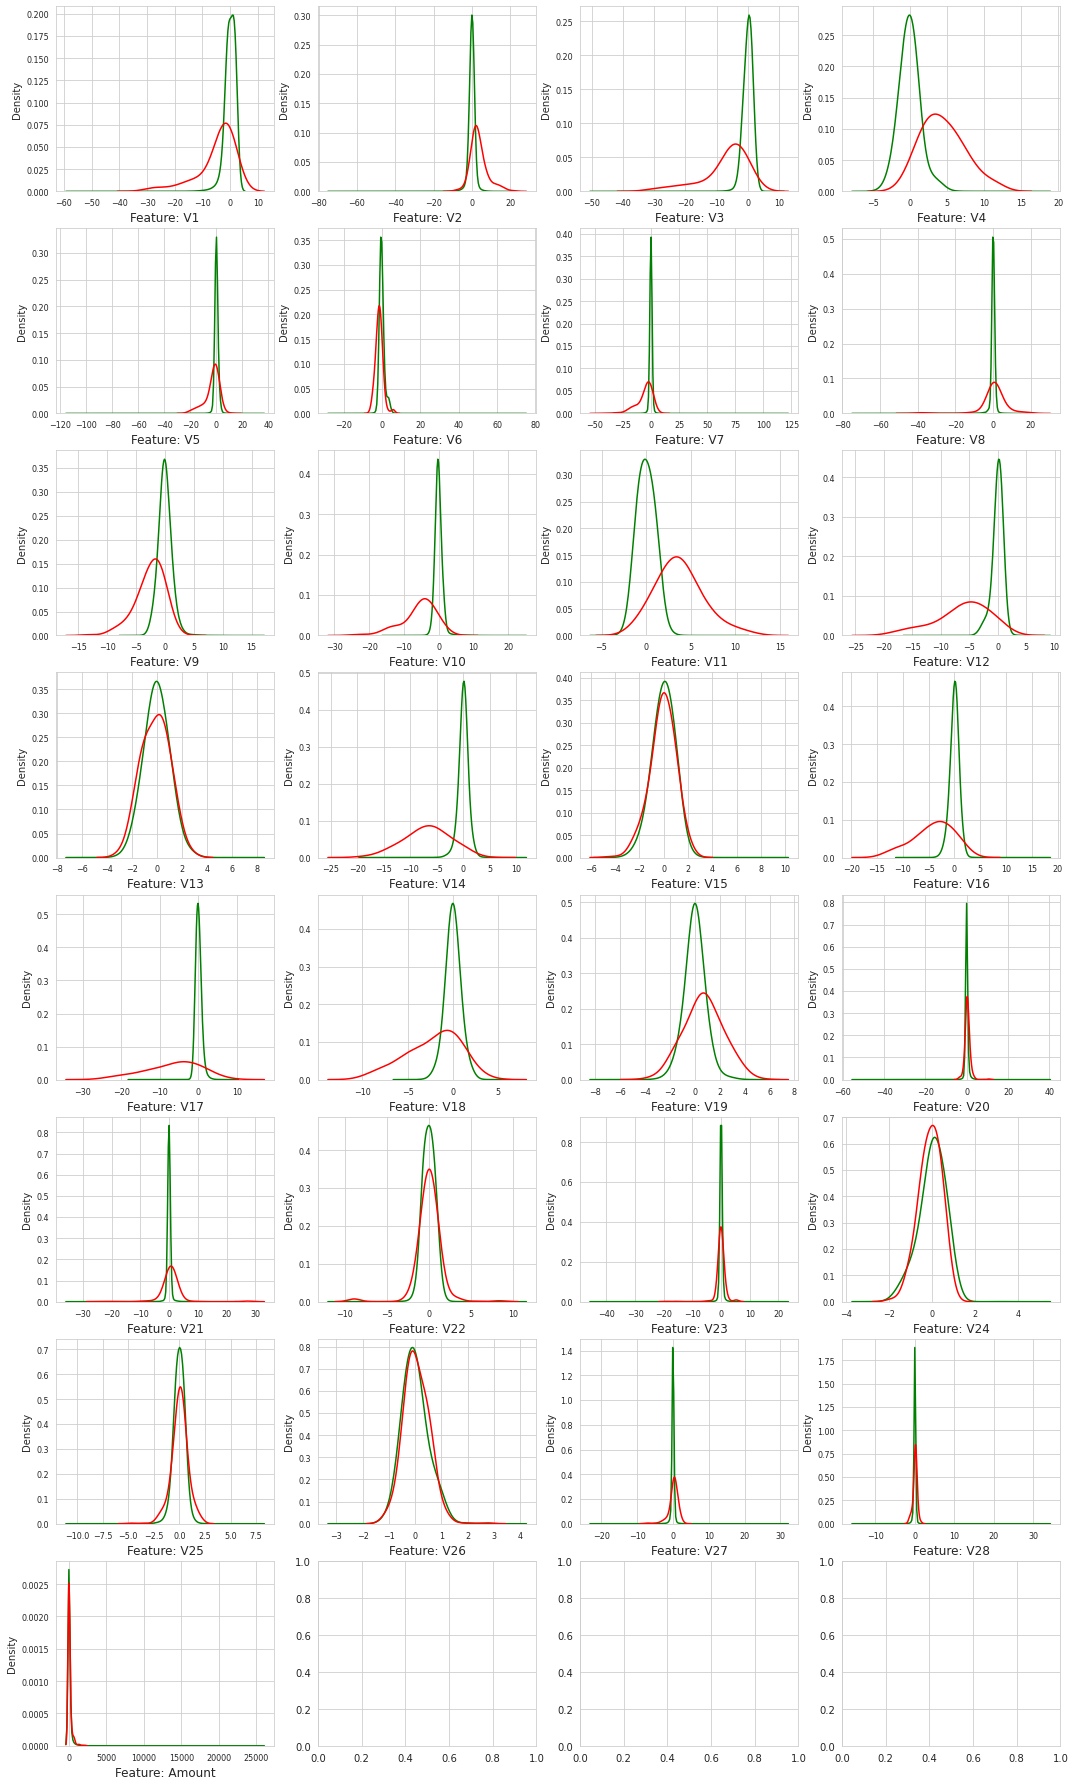

In [28]:
varis = main_miss.columns.values
varis = varis[1:-1]
sns.set_style('whitegrid')
plt.figure()
fig_vars, ax_vars = plt.subplots(8,4,figsize=(18,32))

for i, variable in enumerate(main_miss[varis]):
    plt.subplot(8,4,i+1)
    sns.kdeplot(df_notFraud[variable], bw=0.5,label="Class = 0", color = 'g')
    sns.kdeplot(df_isFraud[variable], bw=0.5,label="Class = 1", color = 'r')
    plt.xlabel('Feature: {}'.format(variable), fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=8)
plt.show();

Features V4, V11, V12 and V14 have clearly separated distributions for Fraud and Not Fraud groups;

V13, V15, V24, V25, V26, V28 and Amount have similar distribution for groups.

### Module 3: Dimension Reduction

As we can see, the feature ‘Amount’ ranges from 0 to 25,691.16. and other features (excluding Time, which we will not use) are the result of a Principal Component Analysis (PCA) transformation. So, we need to rescale the ‘Amount’ variable. To reduce its wide range, I used the ‘standardization’ to remove the mean and scale to unit variance.

In [29]:
#import all necessary packages for dimension reduction and standartization 
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
main_miss['NormalizedAmount'] = scaler.fit_transform(main_miss['Amount'].values.reshape(-1, 1))
main_miss = main_miss.drop(['Time','Amount'],axis=1)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Let's take a small random sample of not fraud cases and merge it with fraud transactions for dimension reduction. As the data is higly umbalanced, it will help to reduce the computation time and cost. Dimension reduction on whole data will be very costly and we need to differ classes/the graph will have almost the same pattern with more points.
I took a random sample of (3*number of fraud transactions) size from not fraud cases.

In [30]:
df_nol=main_miss[main_miss['Class']==0].sample(2*main_miss[main_miss['Class']==1].shape[0], random_state = 10)
df_odin=main_miss[main_miss['Class']==1]
df_red=pd.concat([df_nol,df_odin])
y_red=df_red['Class']
X_red=df_red.drop('Class',1)

I used 2 techniques Isomap and t-SNE. It helped to reduce the dimensions of the data (29d to 2d) and then I created a 2D plot to vizualize the pattern. 

In [31]:
X_reduced_TSNE = TSNE(n_components=2).fit_transform(X_red)
X_reduced_ISO = Isomap(n_components=2).fit_transform(X_red)

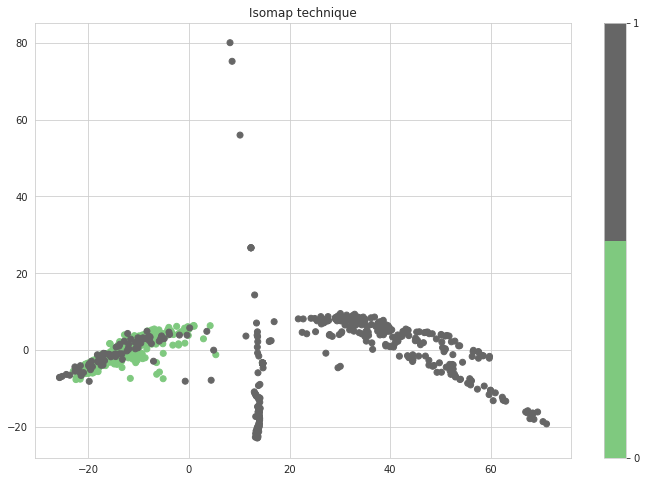

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(X_reduced_ISO[:,0], X_reduced_ISO[:,1], c=y_red, cmap=plt.cm.get_cmap("Accent", 2))
plt.title('Isomap technique')
plt.colorbar(ticks=range(2));

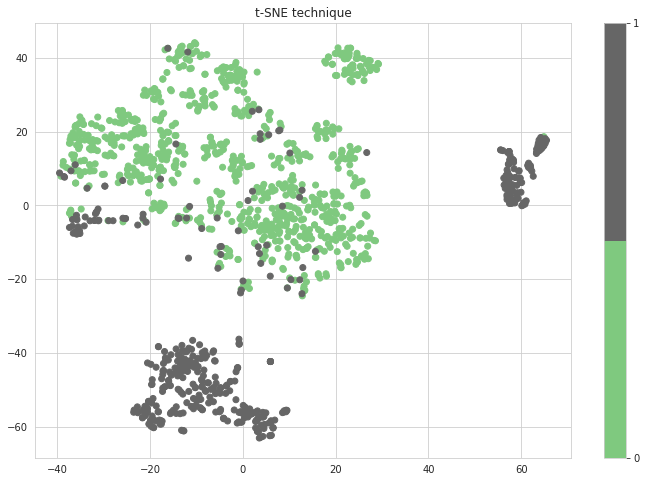

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(X_reduced_TSNE[:,0], X_reduced_TSNE[:,1], c=y_red, cmap=plt.cm.get_cmap("Accent", 2))
plt.title('t-SNE technique')
plt.colorbar(ticks=range(2));

From the plots we can see that Fraud cases are not too far away from the Not Fraud cases. Even more, there are some of the Fraud cases “located” in the Not Fraud group. 

From Isoamp technique we see that Normal cases are more dense located and from t-SNE technique vice-versa: Fraud cases are more densed. Moreover, we can see that Fraud cases that are among Normal cases are more densed in Isomap technique.

Also, we can see from t-SNE plot, there are 2 groups for each of the class and one of that is bigger than another. As the features are under PCA transformation we don't know the exact variables and their meaning. The groups might be generated by any reason: can show from which part of the world the transaction was, was it by individual or business and etc.

Isomap technique has an interesting pattern. We can see the horizontal line of fraud transaction, to the left of which there is the normal transation class and to the right there is fraud transaction calss

### Module 4: Classification

In [34]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

#### Import packages for metrics and cross-validation

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score

In [36]:
df_test = pd.read_csv('creditcard_test.csv')
df_test['NormalizedAmount'] = scaler.fit_transform(df_test['Amount'].values.reshape(-1, 1))
df_test = df_test.drop(['Time','Amount'],axis=1)
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,1.083693,1.179501,-1.346150,1.998824,0.818034,-0.771419,0.230307,0.093683,-0.167594,-1.959809,...,-0.312000,-0.639700,-0.120249,-0.180218,0.609283,-0.339524,0.096701,0.114972,1,-0.449239
1,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,-15.239962,...,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,1,-0.115896
2,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1,-0.449239
3,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1,-0.020698
4,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,1,1.764032


As mentioned eralier the data is clearly unbalanced! I will implement undersampling by creating new dataframe with 50/50 ratio. This is done by randomly selecting N amount of sample from the Not Fraud class, being N the total number of Fraud records.

In [37]:
number_records_fraud = len(main_miss[main_miss['Class'] == 1])
df_normal=main_miss[main_miss['Class'] == 0].sample(number_records_fraud, random_state = 8)
undersample_df = df_normal.append(main_miss[main_miss['Class'] == 1], sort=False).reset_index(drop = True)
print("Percentage of normal transactions: ", undersample_df[undersample_df.Class == 0].shape[0]/undersample_df.shape[0])
print("Percentage of fraud transactions: ", undersample_df[undersample_df.Class == 1].shape[0]/undersample_df.shape[0])

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5


In [38]:
X = undersample_df.drop(['Class'],axis=1)
y = undersample_df['Class']
print('Feature matrix: {}\nTarget array: {}'.format(X.shape, y.shape))

Feature matrix: (884, 29)
Target array: (884,)


In [39]:
X_val = df_test.drop(['Class'],axis=1)
y_val = df_test['Class']
print('Feature matrix for testing: {}\nTarget array for testing: {}'.format(X_val.shape, y_val.shape))

Feature matrix for testing: (150, 29)
Target array for testing: (150,)


In [40]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
            'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
            'NormalizedAmount']

In [41]:
cv = KFold(n_splits=5, random_state=0, shuffle=True) #cv instance

##### Support Vector Machine

Get the hypeparameters of the SVC and choose for tuning:

In [42]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

I will tune C, gamma and kernel hyperparaneters with sklearn.model_selection.GridSearchCV with cross-validation method. It will take 3 hyperparameters and try every single possible combination of the hyperparameters and evaluate with 5 fold cross-validation. I chosed it as grid search is a good way to determine the best hyperparameters values to use.

To use Grid Search, I made another grid model based on the best parameter values provided by random search and train it.

After tuning hyperparameters and training the model, we predict on test dataset:

In [43]:
model_svc = SVC(random_state = 1)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
#
# Instantiate the grid search model
grid_searchSVC = GridSearchCV(model_svc, param_grid, cv = 5, verbose = 1, n_jobs = -1)
grid_searchSVC.fit(X,y.values.ravel())
#take best grid model to create some predictions using the test set
model1 = grid_searchSVC.best_estimator_
preds1= model1.predict(X_val)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.8s finished


Let's take a look at optimal parameters

In [44]:
print('***********************')
print('Best hyperparameters for SVC:{}'.format(grid_searchSVC.best_params_))
print('***********************')

***********************
Best hyperparameters for SVC:{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
***********************


In [45]:
print('Training set metrics:')
print('Accuracy:', accuracy_score(y, model1.predict(X)))
print('Precision:', precision_score(y, model1.predict(X)))
print('Recall:', recall_score(y, model1.predict(X)))

Training set metrics:
Accuracy: 0.9762443438914027
Precision: 1.0
Recall: 0.9524886877828054


In [46]:
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_val, preds1))
print('Precision:', precision_score(y_val, preds1))
print('Recall:', recall_score(y_val, preds1))

Test set metrics:
Accuracy: 0.9733333333333334
Precision: 0.9791666666666666
Recall: 0.94


Great! The model is not overfitting. The accuracy on the test data is almost the same as the training set. Since dataset is unbalanced, the precision and recall scores are more important. The calculated accuracy classification score is not very relevant in the conditions where there is a very large unbalance between the number of 'fraud' and 'not fraud' events in the dataset.

##### Random Forest Classifier

In [47]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Let's tune 'n_estimators', 'max_depth' and 'min_samples_split' parameters.

In [48]:
model_forest = RandomForestClassifier(random_state = 1)
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15, 50]

hyperF = dict(n_estimators = n_estimators, min_samples_split = min_samples_split, max_depth=max_depth)
# Instantiate the grid search model
grid_searchF = GridSearchCV(model_forest, hyperF, cv = 5, verbose = 1, n_jobs = -1)
grid_searchF.fit(X,y.values.ravel())
model2 = grid_searchF.best_estimator_
preds2= model2.predict(X_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


Display the best hyperparameters:

In [49]:
print('***********************')
print('Best hyperparameters for RandomForestClassifier:{}'.format(grid_searchF.best_params_))
print('***********************')

***********************
Best hyperparameters for RandomForestClassifier:{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
***********************


Let's take a look at how it performs on train and test datasets:

In [50]:
print('Training set metrics:')
print('Accuracy:', accuracy_score(y, model2.predict(X)))
print('Precision:', precision_score(y, model2.predict(X)))
print('Recall:', recall_score(y, model2.predict(X)))

Training set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [51]:
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_val, preds2))
print('Precision:', precision_score(y_val, preds2))
print('Recall:', recall_score(y_val, preds2))

Test set metrics:
Accuracy: 0.98
Precision: 0.9795918367346939
Recall: 0.96


Great! It has 100% of accuracy, precision and recall score on training data. Moreover, the model2 is not overfitting as the values for test set is high.

Feature importance for the model:

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


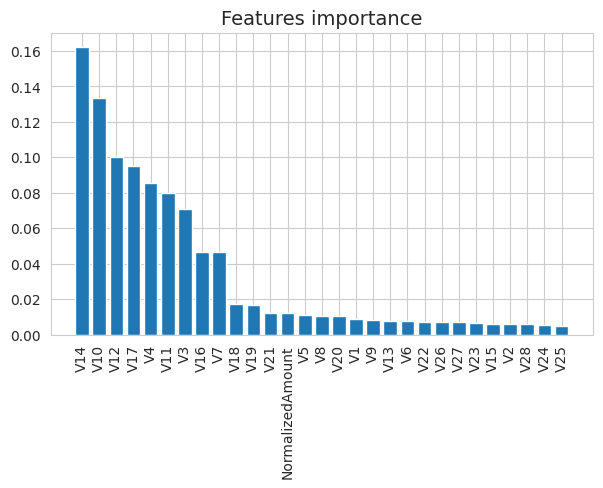

In [52]:
temp = pd.DataFrame({'Feature': features, 'Feature importance': model2.feature_importances_})
temp = temp.sort_values(by='Feature importance',ascending=False)
fig, ax = plt.subplots( figsize=(7, 4), dpi = 100)
ax.set_title('Features importance',fontsize=14)
ax.bar(temp['Feature'],temp['Feature importance'])
ax.set_xticklabels(temp['Feature'],rotation=90)
plt.show()

We cane see that V14 and V10 are the top features contributing to the predictions of the model.

##### AdaBoosterClassifier

In [53]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

Let's tune n_estimators and learning_rate hyperparameters:

After tuning hyperparameters and training the model and preidct on test dataset:

In [54]:
model_ada = AdaBoostClassifier(random_state = 1)
n_estimatorsADA = [10, 100, 400, 800]
learning_rate = [0.001,0.1, 1, 0.5]

hyperADA = dict(n_estimators = n_estimatorsADA, learning_rate = learning_rate)
# Instantiate the grid search model
grid_searchADA = GridSearchCV(model_ada, hyperADA, cv = 5, verbose = 1, n_jobs = -1)
grid_searchADA.fit(X,y.values.ravel()) #fit it
model3 = grid_searchADA.best_estimator_ # best grid model
preds3= model3.predict(X_val)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Display the best hyperparameters:

In [55]:
print('***********************')
print('Best hyperparameters for AdaBoostClassifier:{}'.format(grid_searchADA.best_params_))
print('***********************')

***********************
Best hyperparameters for AdaBoostClassifier:{'learning_rate': 0.1, 'n_estimators': 400}
***********************


Let's take a look at how it performs on train and test datasets:

In [56]:
print('Training set metrics:')
print('Accuracy:', accuracy_score(y, model3.predict(X)))
print('Precision:', precision_score(y, model3.predict(X)))
print('Recall:', recall_score(y, model3.predict(X)))

Training set metrics:
Accuracy: 0.9830316742081447
Precision: 0.9976689976689976
Recall: 0.9683257918552036


In [57]:
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_val, preds3))
print('Precision:', precision_score(y_val, preds3))
print('Recall:', recall_score(y_val, preds3))

Test set metrics:
Accuracy: 0.9466666666666667
Precision: 0.8888888888888888
Recall: 0.96


The precision on the test set is lower than the training set, but not too bad. Further we will evaluate the models with ROC-AUC metrics and build confusion matrix.

Feature importance for the model:

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


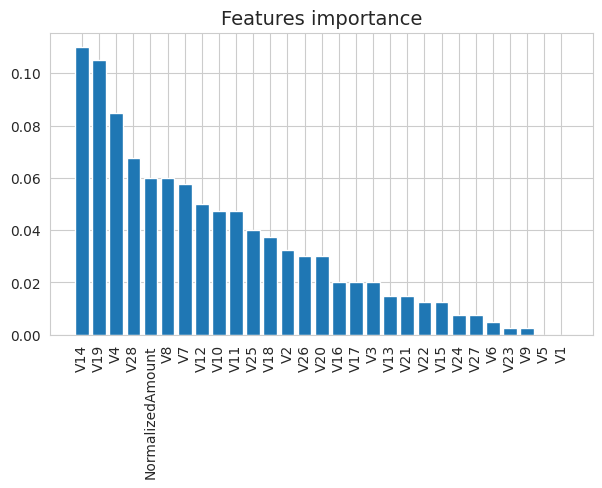

In [58]:
temp = pd.DataFrame({'Feature': features, 'Feature importance': model3.feature_importances_})
temp = temp.sort_values(by='Feature importance',ascending=False)
fig, ax = plt.subplots( figsize=(7, 4), dpi = 100)
ax.set_title('Features importance',fontsize=14)
ax.bar(temp['Feature'],temp['Feature importance'])
ax.set_xticklabels(temp['Feature'],rotation=90)
plt.show()

We cane see that V14, V19 and V4 are the top features contributing to the predictions of the model, while V5 and V1 not contributing at all.

##### Evaluation of the models
After we build 3 classifiers with tuned parameters with 5 fold cross-validation, we trained final models on the whole undersampled data and predict on test data to evaluate the models/compare perfomance.

 "While precision refers to the percentage of your results which are relevant, recall refers to the percentage of total relevant results correctly classified by your algorithm" taken from https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488#:~:text=Precision%20and%20recall%20are%20two,correctly%20classified%20by%20your%20algorithm.

 
I will be focused more on ROC-AUC and recall scores, because it will help us try to capture the most fraudulent transactions. As we know, the data is unbalanced, many observations could be predicted as False Negatives(TYPE 2 ERROR). It means that we predict a normal transaction, but it is in fact a fraudulent one.

This is obvious, if we predict that a certain transaction was fraudulent and in real it was not, is not a critical problem compared to the opposite case.




In [59]:
#We have 3 lists with predicted target value from above 3 final models
model_preds = [preds1,preds2,preds3]
models = ['Support Vector Machine', 'RandomForestClassifier', 'AdaBoosterClassifier']
print(len(preds1))
print(len(preds2))
print(len(preds3))

150
150
150


##### Accuracy Classification Score

In [60]:
for a in range(len(models)):
    perf = accuracy_score(y_val.values, model_preds[a])
    print('\n**************')
    print('\n{} model accuracy: {}'.format(models[a],round(perf, 2)))



**************

Support Vector Machine model accuracy: 0.97

**************

RandomForestClassifier model accuracy: 0.98

**************

AdaBoosterClassifier model accuracy: 0.95


###### ROC-AUC Metrics
I computed Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores of each models to compare:

In [61]:
for a in range(len(models)):
    perf = roc_auc_score(y_val.values, model_preds[a])
    print('\n**************')
    print('\n{} model ROC-AUC score: {}'.format(models[a],perf))



**************

Support Vector Machine model ROC-AUC score: 0.965

**************

RandomForestClassifier model ROC-AUC score: 0.975

**************

AdaBoosterClassifier model ROC-AUC score: 0.95


###### Confusion Matrix
Recall metrics: True Positive/(True Positive+False Negative)

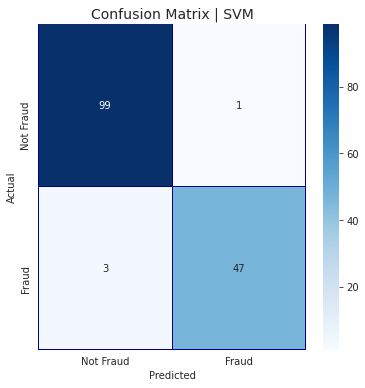

In [62]:
matrix1 = pd.crosstab(y_val.values, preds1, rownames=['Actual'], colnames=['Predicted'])
lbl = ['Not Fraud', 'Fraud']
fig1, ax1 = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(matrix1, xticklabels=lbl, yticklabels=lbl,annot=True,ax=ax1,
                    linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix | SVM', fontsize=14)
plt.show()

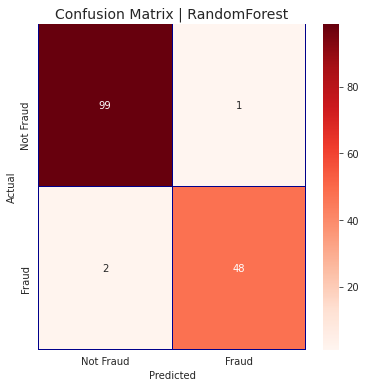

In [63]:
matrix2 = pd.crosstab(y_val.values, preds2, rownames=['Actual'], colnames=['Predicted'])
fig2, ax2 = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(matrix2, xticklabels=lbl, yticklabels=lbl,annot=True,ax=ax2,
                    linewidths=.2,linecolor="Darkblue", cmap="Reds")
plt.title('Confusion Matrix | RandomForest', fontsize=14)
plt.show()

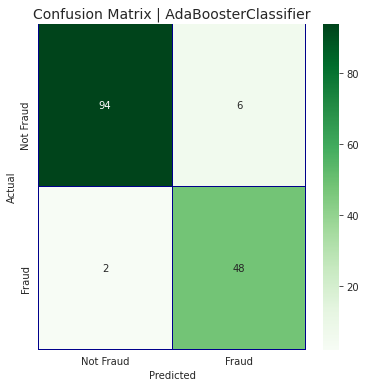

In [64]:
matrix3 = pd.crosstab(y_val.values, preds3, rownames=['Actual'], colnames=['Predicted'])
fig3, ax3 = plt.subplots(ncols=1, figsize=(6,6))
sns.heatmap(matrix3, xticklabels=lbl, yticklabels=lbl,annot=True,ax=ax3,
                    linewidths=.2,linecolor="Darkblue", cmap="Greens")
plt.title('Confusion Matrix | AdaBoosterClassifier', fontsize=14)
plt.show()

In [65]:
# Compute recall scores
for b in range(len(models)):
    model_matrix = confusion_matrix(y_val.values,model_preds[b])
    print('\n**************')
    print("\nRecall score of the {} confusion matrix: {}".format( models[b],model_matrix[1,1]/(model_matrix[1,0]+model_matrix[1,1])))


**************

Recall score of the Support Vector Machine confusion matrix: 0.94

**************

Recall score of the RandomForestClassifier confusion matrix: 0.96

**************

Recall score of the AdaBoosterClassifier confusion matrix: 0.96


### Module 5: Summary
Summarize your findings and draw conclusions.

In conclusion, we have explored the data, checked how the data is highly unbalanced, visualized the data: the features, how the features are distributed in the Fraud group and in the Not Fraud group, and considered the relationship between different features. Then, we applied unsupervised learning methods ,in particular t-SNE and Isomap, to achieve dimension reduction, visualize and interpreted the results. 

Following that we investigated 3 predictive models: SVM, RandomForestClassifier and AdaBoostClassifier. Firstly, I prepared the data – as data was highly unbalanced I implemented undesampling. I prepared both data for training and for testing. Then we tuned hyperparameters for the models with GridSearch and 5 fold cross-validation was used to evaluate the performance of the model with every combination of hyperparameters. After, the best estimators were trained with training data.

I started with Support Vector Classifier, for which I obtained an Accuracy = 0.97, ROC-AUC of score 0.965 and Recall score of 0.94 when predicting the target value for the test dataset.

Then I investigated RandomForestClassifier, for which I obtained an Accuracy = 0.98, ROC-AUC of score 0.975 and Recall score of 0.96 when predicting the target value for the test dataset.

Then I investigated Adaptive Boosting Classifier, for which I obtained an Accuracy = 0.95, ROC-AUC of score 0.95 and Recall score of 0.96 when predicting the target value for the test dataset.

I obtained 3 predictive models with high perfomance using the whole dataset, not removing the outliers. RandomForestClassifier has the highest ROC-AUC, precision and recal scores.


In [66]:
for model in range(len(models)):
    ROC = roc_auc_score(y_val.values, model_preds[model])
    precision = precision_score(y_val.values, model_preds[model])
    recall = recall_score(y_val.values, model_preds[model])
    print('\033[91mModel {} - {}:\033[0m\n'.format(model+1, models[model]))
    print('ROC-AUS Score = ', ROC)
    print('Precision Score = ', round(precision,2))
    print('Recall Score = ', recall)
    print('\n\n')

Model 1 - Support Vector Machine:

ROC-AUS Score =  0.965
Precision Score =  0.98
Recall Score =  0.94



Model 2 - RandomForestClassifier:

ROC-AUS Score =  0.975
Precision Score =  0.98
Recall Score =  0.96



Model 3 - AdaBoosterClassifier:

ROC-AUS Score =  0.95
Precision Score =  0.89
Recall Score =  0.96



